In [58]:
from sphviewer.tools import QuickView
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import heapq
from scipy.spatial import cKDTree
import matplotlib as mpl
# from pygadgetreader.readgadget.readgadget import readsnap, readhead, readheader
from pygadgetreader import readsnap, readhead, readheader
# import pygadgetreader
import random


from colossus.cosmology import cosmology
from astropy.cosmology import z_at_value
# from astropy import units as unit
# from astropy.coordinates import SkyCoord
params = {'flat': True, 'H0': 67.77, 'Om0': 0.307, 'Ob0': 0.04825, 'sigma8': 0.8288, 'ns': 0.9611}
cosmology.addCosmology('planck14', params)
cosmo = cosmology.setCosmology('planck14')
from matplotlib.colors import LogNorm

In [173]:
def  plot_dm(dm_pos, scale_subhalo, rotation_matrix, file_id, simulation_name ,z,  r = 'infinity', p = 0,v = [6, 10.5], zoom=1):
    if simulation_name[-5:] == 'zcut7':
        dm_mass = 4.487624628512032e-05 *10**10
    elif simulation_name[-7:] == '7DM_GAS':
        dm_mass = 5.942038569628494e-06 *10**10
    else:
        print('error!')
        return
    dm_rot = dm_pos.copy()
    dm_rot[:, :3] = np.dot(dm_rot[:, :3], rotation_matrix)
    dm_rot = dm_rot[dm_rot[:,0]>(-scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,0]<(+scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,1]>(-scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,1]<(+scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,2]>(-scale_subhalo)]
    dm_rot = dm_rot[dm_rot[:,2]<(+scale_subhalo)]

    dm_rot_pos = np.hstack((np.array([dm_rot[:,1]]).T, np.array([dm_rot[:,2]]).T,\
                                    np.array([dm_rot[:,0]]).T))
    print(file_id)

    
    # sphviewer
    dm_mass = np.ones(len(dm_rot)) * dm_mass
    qv_dm_rot = QuickView(dm_rot[:, :3], mass=dm_mass, x=0, y=0, z=0,  r=r, plot=False,  p=p,zoom=zoom)
    img = qv_dm_rot.get_image()
    extent = qv_dm_rot.get_extent()*1000
    fig = plt.figure(1,figsize=(6,5), dpi = 150)
    norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    # imshow
    plt.imshow(img, extent=extent, cmap='gist_stern',origin='lower', norm=norm)
    # draw_r = 250
    # plt.xlim(-draw_r, draw_r)
    # plt.ylim(-draw_r, draw_r)
    plt.xlabel('$y\ (kpc)$')
    plt.ylabel('$z\ (kpc)$')
    # plt.axis('off') 
    plt.title(simulation_name+ ", z=%.3f, t=%.3fGyr"%(z, cosmo.age(z)))
    # fig.text(0.80, 0.95, "z=%.3f"%z, color='white',fontsize = 20,bbox={'facecolor':'w', 'alpha':0, 'pad':5})
    # fig.text(0.05, 0.95, "phy_dis =%.3fMpc"%(scale_subhalo/(1+z)), color='white', fontsize = 20, bbox={'facecolor':'b', 'alpha':0, 'pad':5})
    # plt.gca().set_position([0, 0, 1, 1])
    plt.tight_layout()
    # plt.autoscale()
    # plt.savefig('./dm_evolution/'+file_id+'.png')
    plt.savefig('dm_'+simulation_name+'dpi1000.png', dpi=1000)
    # 设置参数 bbox_inches='tight', pad_inches=0 
    # plt.gca().set_axis_off()
    # plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
    #             hspace = 0, wspace = 0)
    # plt.margins(0,0)
    # fig.savefig('pic/%s/%s.png' % (simulation_name, file_id), bbox_inches='tight', pad_inches=0)

    # plt.close()
    # plt.show()
    return 0

In [4]:
import multiprocessing

def calculate_array(start, end):
    result = []
    for i in range(start, end):
        result.append(i * 2)  # 这里只是一个示例计算
    return result

if __name__ == '__main__':
    num_processes = 10  # 设置进程数量
    start = 0
    end = 200
    
    pool = multiprocessing.Pool(processes=num_processes)
    results = []
    
    chunk_size = (end - start) // num_processes  # 计算每个进程处理的数据范围
    
    for i in range(num_processes):
        process_start = start + i * chunk_size
        process_end = process_start + chunk_size
        result = pool.apply_async(calculate_array, (process_start, process_end))
        results.append(result)
    
    pool.close()
    pool.join()
    
    final_result = []
    for result in results:
        final_result.extend(result.get())
    
    print(final_result)


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398]


In [179]:
# specify for which entries below to calculate the satellite positions at each redshift
# #systems = [16, 17, 18, 19]
systems = [0]
# system = 1

# central galaxy index (i.e.) position in the Galform file (one entry per system)
# only needed for the systems where the central is not a type=0 galaxy with the largest halo mass
# index of the galaxy in the Galform file dataset 'Output001'

simulation_names = [
    "M1_zcut7", # 0
    "M2_zcut7",
    "M3_zcut7",
    "M4_zcut7",
    "M5_zcut7",
    "M1_7DM_GAS", #5 
    "M2_7DM_GAS",
    "M3_7DM_GAS",
    "M4_7DM_GAS",
    "M5_7DM_GAS"
]


# from 13 satellite
# rotation_matrix = np.array([[-0.58925189,  0.3286197 , -0.73809979],\
#                            [-0.32955748, -0.9318545 , -0.15178623],\
#                            [-0.73768155,  0.15380598,  0.65739611]])

file_ids = np.loadtxt("data/file_id.txt",dtype=str)
h = 0.6777
i = 199
# i = 134
z = np.loadtxt("data/z.txt")
file_id = file_ids[i]

In [182]:
for system in systems:
    simulation_name = simulation_names[system]
    dm_MR = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/dm_data_1200kpc/%s.txt"%(simulation_name, file_id))
    # dm_MR = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/%s_%s.txt"%(simulation_name, simulation_name, file_id))
# dm_HR = np.loadtxt("/data/inspur_disk06/userdir/zhaox/"+simulation_name +'/'+M4_7DM_GAS_199_z000p000.txt")

In [6]:
"/data/inspur_disk06/userdir/zhaox/%s/%s_%s.txt"%(simulation_name, simulation_name, file_id)

'/data/inspur_disk06/userdir/zhaox/M2_zcut7/M2_zcut7_199_z000p000.txt'

In [183]:
tan_225 = 0.41421356237
scale_subhalo = 0.3*(1+z[i])

r = scale_subhalo/tan_225
p = 0
v = [6, 10.5]

# v = [4.5,9]

rotation_matrix = np.array([[-0.66681059,  0.13506486, -0.73288548],
                            [-0.04041349, -0.98854559, -0.14541102],
                            [-0.74413063, -0.06734315,  0.66463111]])
# rotation_matrix = np.array([[1,0,0],[0,1,0],[0,0,1]])
zoom = 1/tan_225

In [184]:
scale_subhalo

0.30000000000000004

199_z000p000


0

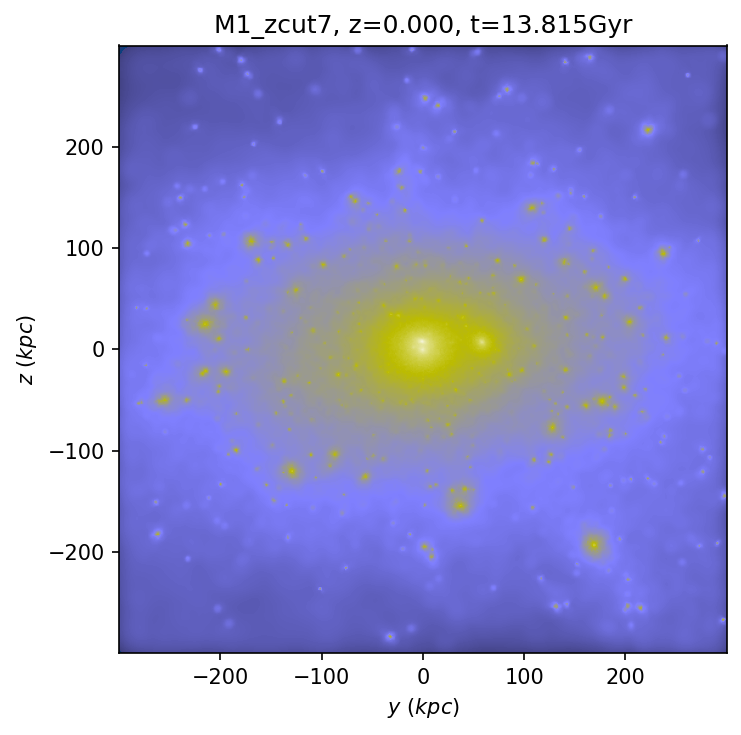

In [185]:
plot_dm(dm_MR/h, scale_subhalo, rotation_matrix, file_id, simulation_name, z[i], r = 'infinity', p = p, v=[9,15], zoom=1)

In [144]:
dm_rot.shape

(10538651, 3)

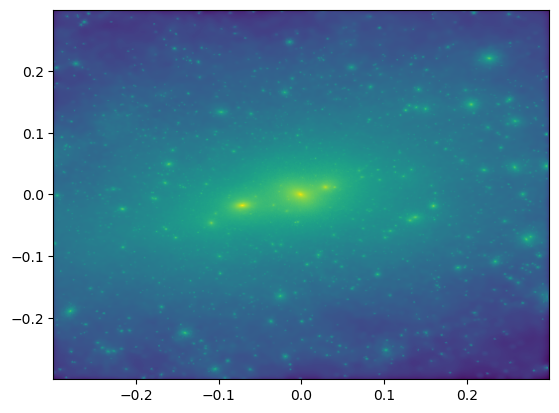

In [149]:
qv_dm_rot = QuickView(dm_rot[:, :3], mass=dm_mass, x=0, y=0, z=0,  r='infinity', plot=True,  p=p)
# qv_dm_rot.imshow(cmap='inferno', vmax=10.5,vmin = 7)

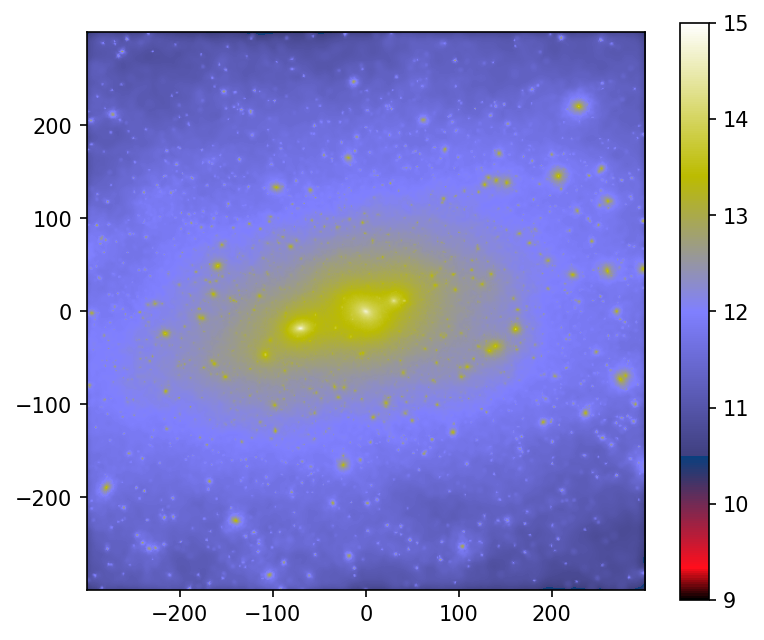

In [167]:
# qv_dm_rot.imshow(cmap='gist_stern', vmax = 10, vmin=5.5)
# plt.colorbar(im)
img = qv_dm_rot.get_image()
extent = qv_dm_rot.get_extent()*1000
fig = plt.figure(figsize=(6, 5), dpi=150)
ax = fig.add_subplot(111)
im = ax.imshow(img, origin="lower", extent=extent, cmap='gist_stern', vmax = 15, vmin=9)
plt.colorbar(im)

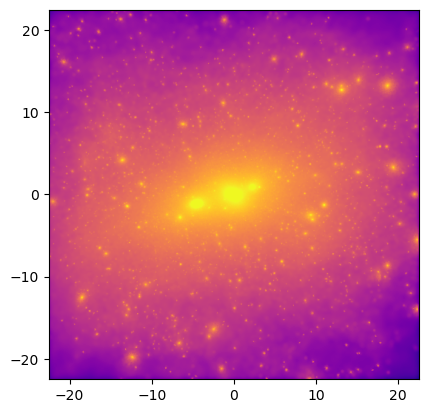

In [104]:
qv_dm_rot.imshow(cmap='plasma', vmax = 10, vmin=6)

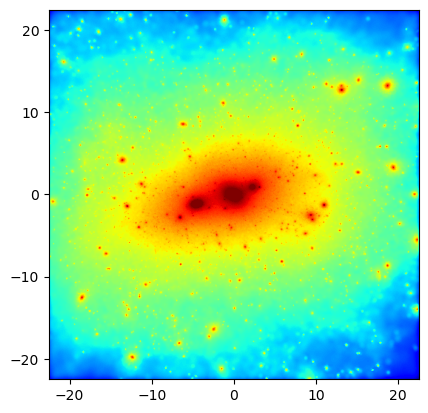

In [108]:
qv_dm_rot.imshow(cmap='jet', vmax = 10, vmin=6)

In [ ]:
coolwarm

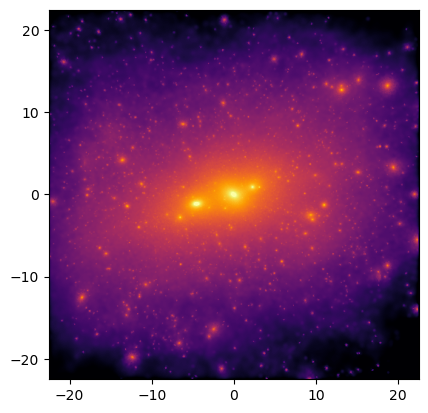

In [112]:
qv_dm_rot.imshow(cmap='inferno', vmax=10.5,vmin = 7)

In [45]:
np.max(dm_rot[:,0])

0.29999981493077527

In [49]:
dm_rot[2000:2200, :3]

array([[ 0.160281  , -0.04163573,  0.12282906],
       [ 0.16014886, -0.04183393,  0.12289455],
       [ 0.16073135, -0.04149625,  0.12343863],
       [ 0.1605888 , -0.04148164,  0.12294281],
       [ 0.16106652, -0.04170956,  0.12250708],
       [ 0.16100122, -0.04178385,  0.12286087],
       [ 0.16104955, -0.04242776,  0.12372075],
       [ 0.16186445, -0.04264285,  0.12319642],
       [ 0.16159495, -0.04299344,  0.12252917],
       [ 0.1617945 , -0.04205289,  0.12245692],
       [ 0.16142629, -0.04200846,  0.12243576],
       [ 0.16155768, -0.04185079,  0.12303719],
       [ 0.16191376, -0.04150643,  0.12257093],
       [ 0.16185775, -0.04191866,  0.12363757],
       [ 0.161518  , -0.04186028,  0.12363152],
       [ 0.16138607, -0.04173991,  0.12359103],
       [ 0.16121623, -0.04149349,  0.12428961],
       [ 0.16174387, -0.04264106,  0.12416445],
       [ 0.16087026, -0.04275764,  0.12447385],
       [ 0.16054462, -0.04278231,  0.12451217],
       [ 0.16121663, -0.04224536,  0.124

199_z000p000


0

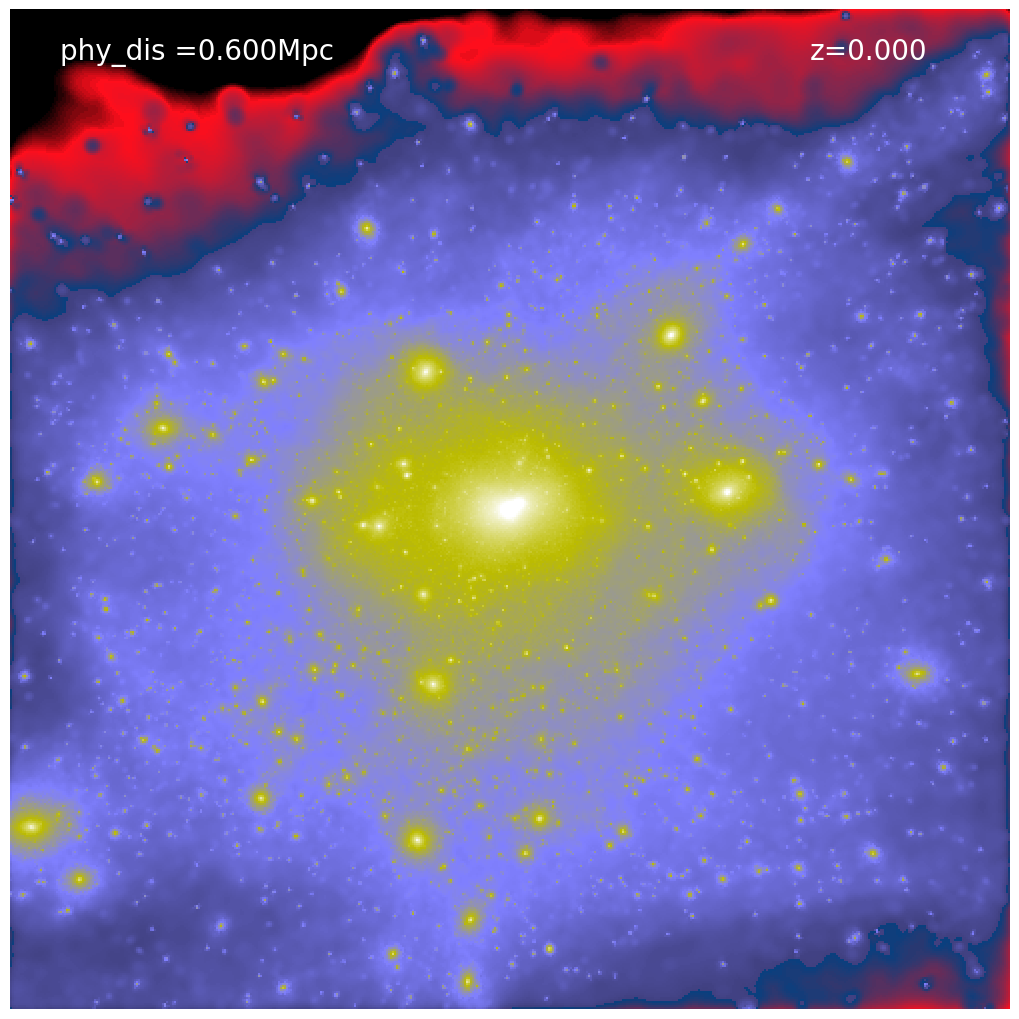

In [19]:
# 603.55
#scale_subhalo/tan_225
plot_dm(dm_HR/h, scale_subhalo, rotation_matrix, file_id, '7DM_GAS', z[i], r = r, p = p, v=v, zoom=zoom)

In [19]:

# scale_subhalo = 0.3
# r = scale_subhalo/tan_225
# p = 0
# v = [7, 10.5]
# # v = [4.5,9]
# zoom = 1/tan_225
# rotation_matrix = np.array([[-0.4417713 ,  0.69599792, -0.56606096],
#        [ 0.07457423, -0.60029704, -0.79629275],
#        [-0.89402282, -0.39399285,  0.2132905 ]])

In [ ]:
# from 13 satellite
rotation_matrix = np.array([[-0.58925189,  0.3286197 , -0.73809979],\
                           [-0.32955748, -0.9318545 , -0.15178623],\
                           [-0.73768155,  0.15380598,  0.65739611]])
scale_subhalo = 300
for index, file_id in enumerate(file_ids[128:]):
    dm = np.loadtxt("./dm_data/dm_rot_pos"+file_id+".txt")
    p = -0.9 * index + 180
    plot_dm(dm, scale_subhalo, rotation_matrix, file_id=file_id, r = 603.55, p = p, v=[6, 10.5], zoom=2.41421356237)

128_z001p150
129_z001p125
130_z001p099
131_z001p074
132_z001p049
133_z001p024
134_z001p000
135_z000p976
136_z000p952
137_z000p928
138_z000p905
139_z000p882
140_z000p859
141_z000p837
142_z000p815
143_z000p793
144_z000p772
145_z000p750
146_z000p729
147_z000p709
148_z000p689
149_z000p669
150_z000p649
151_z000p630
152_z000p611
153_z000p592
154_z000p573
155_z000p555
156_z000p537
157_z000p520
158_z000p503
159_z000p486
160_z000p469
161_z000p452
162_z000p436
163_z000p420
164_z000p405
165_z000p389
166_z000p374
167_z000p360
168_z000p345
169_z000p331
170_z000p317
171_z000p303
172_z000p289
173_z000p276
174_z000p263
175_z000p250
176_z000p237
177_z000p225
178_z000p213
179_z000p201
180_z000p189
181_z000p177
182_z000p166
183_z000p155
184_z000p144
185_z000p133
186_z000p122
187_z000p112
188_z000p102
189_z000p092
190_z000p082
191_z000p072
192_z000p063
193_z000p053
194_z000p044
195_z000p035
196_z000p026
197_z000p017
198_z000p008
199_z000p000


In [ ]:
import imageio
filenames = os.listdir("/home/zhaox/app/dm_pig/dm_pic_1200kpc")
filenames.sort(key=lambda x:float(x[0:3]))
with imageio.get_writer('./dm_gif/dm_evolution_1000kpc.gif', mode='I',duration=0.1) as writer:
    for filename in filenames:
        print(filename)
        image = imageio.imread("/home/zhaox/app/dm_pig/dm_pic_1200kpc/"+filename)
        writer.append_data(image)

004_z015p951.png
005_z015p172.png
006_z014p462.png
007_z013p813.png
008_z013p216.png
009_z012p666.png
010_z012p157.png
011_z011p686.png
012_z011p247.png
013_z010p839.png
014_z010p457.png
015_z010p100.png
016_z009p766.png
017_z009p451.png
018_z009p155.png
019_z008p876.png
020_z008p612.png
021_z008p363.png
022_z008p127.png
023_z007p903.png
024_z007p691.png
025_z007p489.png
026_z007p296.png
027_z007p113.png
028_z006p939.png
029_z006p772.png
030_z006p613.png
031_z006p461.png
032_z006p315.png
033_z006p176.png
034_z006p042.png
035_z005p914.png
036_z005p791.png
037_z005p673.png
038_z005p559.png
039_z005p449.png
040_z005p343.png
041_z005p241.png
042_z005p142.png
043_z005p047.png
044_z004p955.png
045_z004p865.png
046_z004p778.png
047_z004p694.png
048_z004p612.png
049_z004p533.png
050_z004p455.png
051_z004p380.png
052_z004p307.png
053_z004p235.png
054_z004p166.png
055_z004p097.png
056_z004p031.png
057_z003p966.png
058_z003p902.png
059_z003p840.png
060_z003p779.png
061_z003p720.png
062_z003p661.p